# Preparing

The essence of the project is to track the impact of living conditions of students aged 15 to 22 on their academic performance in mathematics, in order to identify students at risk at an early stage.

## download dataset

In [1]:
!wget https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-11+19FEB2020+type@asset+block/stud_math.csv

--2020-06-10 02:57:11--  https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-11+19FEB2020+type@asset+block/stud_math.csv
Распознаётся lms.skillfactory.ru (lms.skillfactory.ru)… 84.201.175.12
Подключение к lms.skillfactory.ru (lms.skillfactory.ru)|84.201.175.12|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 47309 (46K) [application/vnd.ms-excel]
Сохранение в: «stud_math.csv»

stud_math.csv       100%[===================>]  46,20K  --.-KB/s    за 0,007s  

2020-06-10 02:57:12 (6,17 MB/s) - «stud_math.csv» сохранён [47309/47309]



## import libs

In [2]:
# pandas for data manipulation
import pandas as pd

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# stats, combinations & other helper functions
from itertools import combinations
from scipy.stats import ttest_ind

## read dataset

In [3]:
pd.set_option('display.max_rows', 50)  # show more rows
pd.set_option('display.max_columns', 30)  # show more columns

math = pd.read_csv('stud_math.csv')

## dataset sneak peek

In [4]:
display(math.head())
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## columns in dataset

1 school - the abbreviation of the school in which the student is studying

2 sex - student gender ('F' - female, 'M' - male)

3 age - student's age (from 15 to 22)

4 address - type of student address ('U' - urban, 'R' - outside the city)

5 famsize - family size ('LE3' <= 3, 'GT3'> 3)

6 Pstatus - status of joint housing of parents ('T' - live together 'A' - separately)

7 Medu - mother's education (0 - no, 1 - 4 classes, 2 - 5-9 classes, 3 - secondary special or 11 classes, 4 - higher)

8 Fedu - father's education (0 - no, 1 - 4 classes, 2 - 5-9 classes, 3 - secondary special or 11 classes, 4 - higher)

9 Mjob - mother's work ('teacher' - teacher, 'health' - healthcare, 'services' - public service, 'at_home' - not working, 'other' - other)

10 Fjob - father's work ('teacher' - teacher, 'health' - healthcare, 'services' - public service, 'at_home' - not working, 'other' - other)

11 reason - the reason for choosing a school ('home' - proximity to home, 'reputation' - school reputation, 'course' - educational program, 'other' - other)

12 guardian - guardian ('mother' - mother, 'father' - father, 'other' - other)

13 traveltime - travel time to school (1 - <15 min., 2 - 15-30 min., 3 - 30-60 min., 4 -> 60 min.)

14 studytime - time to study in addition to school per week (1 - <2 hours, 2 - 2-5 hours, 3 - 5-10 hours, 4 -> 10 hours)

15 failures - the number of extracurricular failures (n, if 1 <= n <3, otherwise 0)

16 schoolsup - additional educational support (yes or no)

17 famsup - family educational support (yes or no)

18 paid - additional paid classes in mathematics (yes or no)

19 activities - additional extracurricular activities (yes or no)

20 nursery - attended kindergarten (yes or no)

21 higher - wants to get a higher education (yes or no)

22 internet - Internet at home (yes or no)

23 romantic - in a romantic relationship (yes or no)

24 famrel - family relationships (from 1 - very poor to 5 - very good)

25 freetime - free time after school (from 1 - very little to 5 - very much)

26 goout - spending time with friends (from 1 - very little to 5 - very much)

27 health - current state of health (from 1 - very poor to 5 - very good)

28 absences - the number of missed classes

29 score - math exam scores

In [5]:
math.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [6]:
math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000





Lets look on % of nan values in each column

In [7]:
math.isnull().sum() / len(math) * 100

school                  0.000000
sex                     0.000000
age                     0.000000
address                 4.303797
famsize                 6.835443
Pstatus                11.392405
Medu                    0.759494
Fedu                    6.075949
Mjob                    4.810127
Fjob                    9.113924
reason                  4.303797
guardian                7.848101
traveltime              7.088608
studytime               1.772152
failures                5.569620
schoolsup               2.278481
famsup                  9.873418
paid                   10.126582
activities              3.544304
nursery                 4.050633
studytime, granular     1.772152
higher                  5.063291
internet                8.607595
romantic                7.848101
famrel                  6.835443
freetime                2.784810
goout                   2.025316
health                  3.797468
absences                3.037975
score                   1.518987
dtype: flo

## first revelations

We have dataset with 395 rows and 30 columns, 17 of them are string and other 13 are numeric. On first look like there no one column that won't be relevant in our exploratory analysis. % of nan values in columns no more then 12. But column 'paid' in theory should have a major impact on column 'score', but it is not exactly.

# Columns maintenance

We need to copy our dataset and start work with this copy.

In [8]:
math_copy = math.copy()

In [9]:
display(math_copy.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [10]:
math_copy.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [11]:
math_copy.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


We can see that there is one extreme value in Fedu, suppose this is a mistake and fix it

In [12]:
math_copy[math_copy['Fedu'] == 40]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [13]:
math_copy['Fedu'] = math_copy['Fedu'].replace([40], 4)

Suppose this is a mistake too, repeat fix

In [14]:
math_copy[math_copy['famrel'] == -1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [15]:
math_copy['famrel'] = math_copy['famrel'].replace([-1], 1)

We can see that in 'absences' there are one ore more extreme values, 75% is 8 and max is 385. Lets look

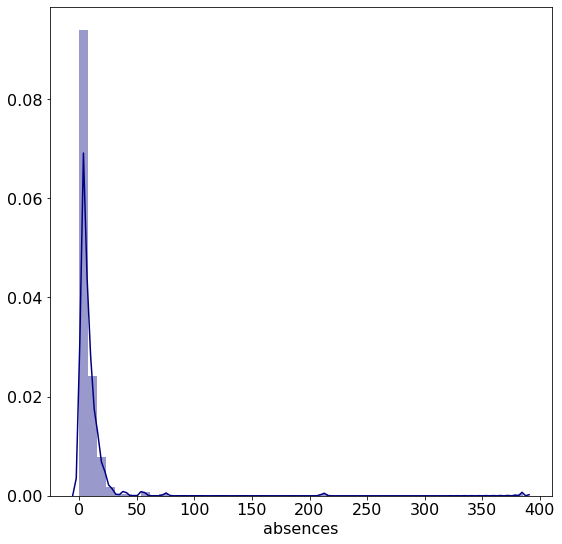

In [16]:
sns.distplot(math_copy['absences'], color='navy', hist_kws={'alpha': 0.4})

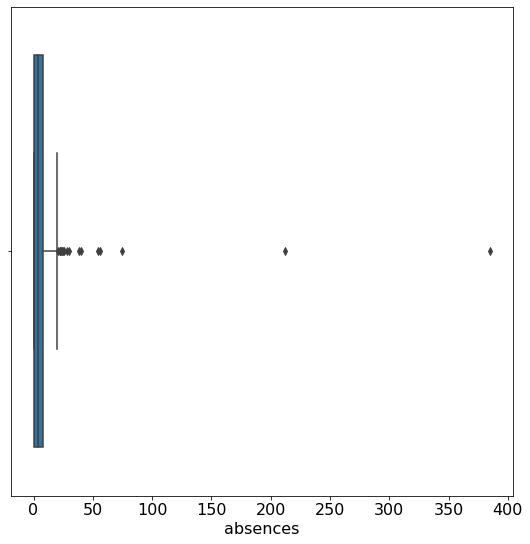

In [17]:
sns.boxplot(math_copy['absences'])

In [18]:
math_copy['absences'].describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

it looks like all that more than (75% quartile + 1.5 * (75% quartile - 25% quartile) 20 is outlier

In [19]:
math_copy.drop(math_copy.loc[math_copy['absences'] > 20].index, inplace=True)

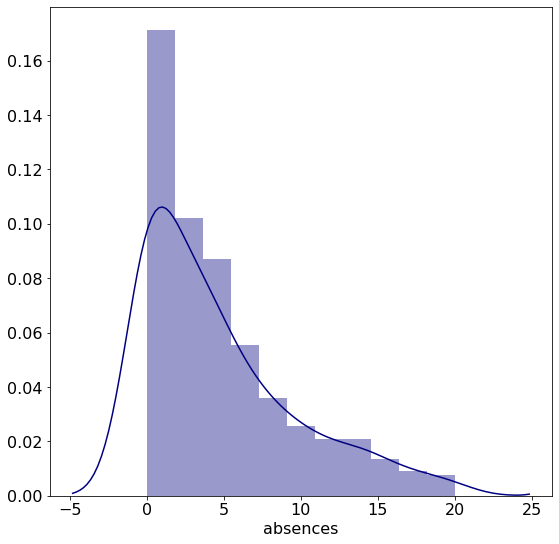

In [20]:
sns.distplot(math_copy['absences'], color='navy', hist_kws={'alpha': 0.4})

Now fill NaN

First fill 'score' NaN

In [21]:
math_copy['score'].describe()

count    372.000000
mean      52.231183
std       23.072493
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [22]:
math_copy['score'].value_counts()

50.0     54
55.0     42
0.0      37
75.0     33
60.0     31
65.0     30
40.0     28
70.0     27
45.0     23
80.0     16
30.0     14
90.0     10
35.0      9
25.0      7
95.0      5
85.0      5
100.0     1
Name: score, dtype: int64

Most of values equal 50, it's slightly less than mean value. its only 6 empty cells. so lets fill nan 

In [23]:
math_copy['score'].fillna(value=50, inplace=True)

## object columns

although there aren’t so many NaN values, they are scattered all over the dataset and when you drop all, only 98 rows out of 395

fill all object NaN with new value - noData

In [24]:
str_cols = math_copy.select_dtypes(include=['object']).columns
math_copy.loc[:, str_cols] = math_copy.loc[:, str_cols].fillna('noData')

In [25]:
math_copy.select_dtypes(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,noData,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,noData,no
1,GP,F,U,GT3,noData,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,noData,no,yes,yes,yes,noData
3,GP,F,U,GT3,T,health,noData,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,MS,F,U,GT3,T,other,other,course,mother,no,no,no,yes,yes,yes,noData,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,noData,noData,no,no,no,no,noData,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,noData,no,yes,yes,no


## float64 & int64 columns

In [26]:
num_cols = math_copy.select_dtypes(include=['float64', 'int64']).columns

In [27]:
math_copy.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,378.000000,375.000000,355.000000,350.000000,371.000000,359.000000,371.000000,352.000000,369.000000,370.000000,363.000000,366.000000,378.000000
mean,16.664021,2.730667,2.498592,1.437143,2.045822,0.325905,-6.137466,3.948864,3.257453,3.108108,3.548209,4.603825,52.195767
std,1.266096,1.106371,1.097956,0.702262,0.851423,0.741562,2.554270,0.907518,0.978772,1.111258,1.390483,4.965512,22.889859
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,41.250000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,7.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,20.000000,100.000000


'use pandas linear interpolate to fill numeric and cross your fingers'

In [28]:
math_copy.loc[:, num_cols] = math_copy.loc[:, num_cols].interpolate(
    method='linear', limit_direction='forward')

In [29]:
math_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               378 non-null    object 
 1   sex                  378 non-null    object 
 2   age                  378 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              378 non-null    object 
 5   Pstatus              378 non-null    object 
 6   Medu                 378 non-null    float64
 7   Fedu                 378 non-null    float64
 8   Mjob                 378 non-null    object 
 9   Fjob                 378 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             378 non-null    object 
 12  traveltime           378 non-null    float64
 13  studytime            378 non-null    float64
 14  failures             378 non-null    float64
 15  schoolsup            378 non-null    obj

looks like it fills. compare the result for math and math_copy

In [30]:
math_copy.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,16.664021,2.731481,2.482804,1.440476,2.046296,0.325397,-6.138889,3.961640,3.261905,3.107143,3.534392,4.609788,52.195767
std,1.266096,1.105803,1.083630,0.688030,0.843826,0.733756,2.531477,0.893825,0.969798,1.110489,1.379129,4.944169,22.889859
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,41.250000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,3.500000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,7.000000,70.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,20.000000,100.000000


In [31]:
math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Yeah! Don't look so different but haven't NaN 

# Analysis

## 'score' first look

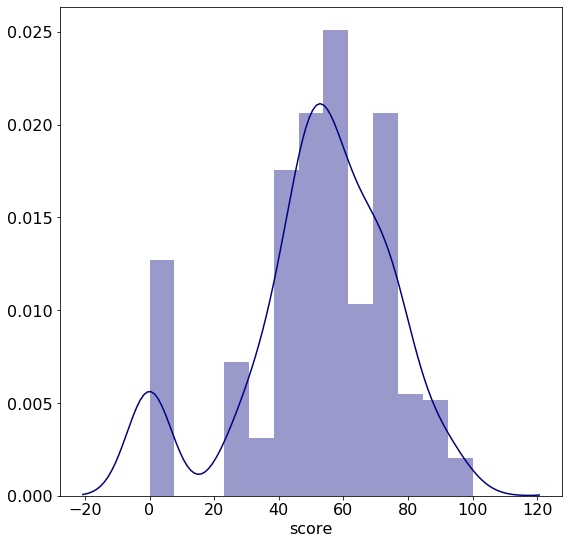

In [32]:
sns.distplot(math_copy['score'], color='navy', hist_kws={'alpha': 0.4})

In [33]:
math_copy['score'].value_counts()

50.0     60
55.0     42
0.0      37
75.0     33
60.0     31
65.0     30
40.0     28
70.0     27
45.0     23
80.0     16
30.0     14
90.0     10
35.0      9
25.0      7
95.0      5
85.0      5
100.0     1
Name: score, dtype: int64

In [34]:
math_copy['score'].describe()

count    378.000000
mean      52.195767
std       22.889859
min        0.000000
25%       41.250000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Hm...37 zero (0) values what looks superfluous. What that what does it mean:
    37 students skip test or they completely failed or something else.

## numerical data

take only the numerical columns

columns 'age' and 'absences' are true numeric data. 

columns 'Medu', 'Fedu', 'traveltime', 'studytime','studytime, granular', 'failures', 'famrel', 'freetime', 'goout', 'health' although formally categorical, they contain continuous meanings from the smallest to the largest. I will also use them in correlation analysis.



In [35]:
math_num = math_copy.select_dtypes(include=['float64', 'int64'])
math_num.head()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0


Now lets plot them all:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fed14197e50>,
      dtype=object)

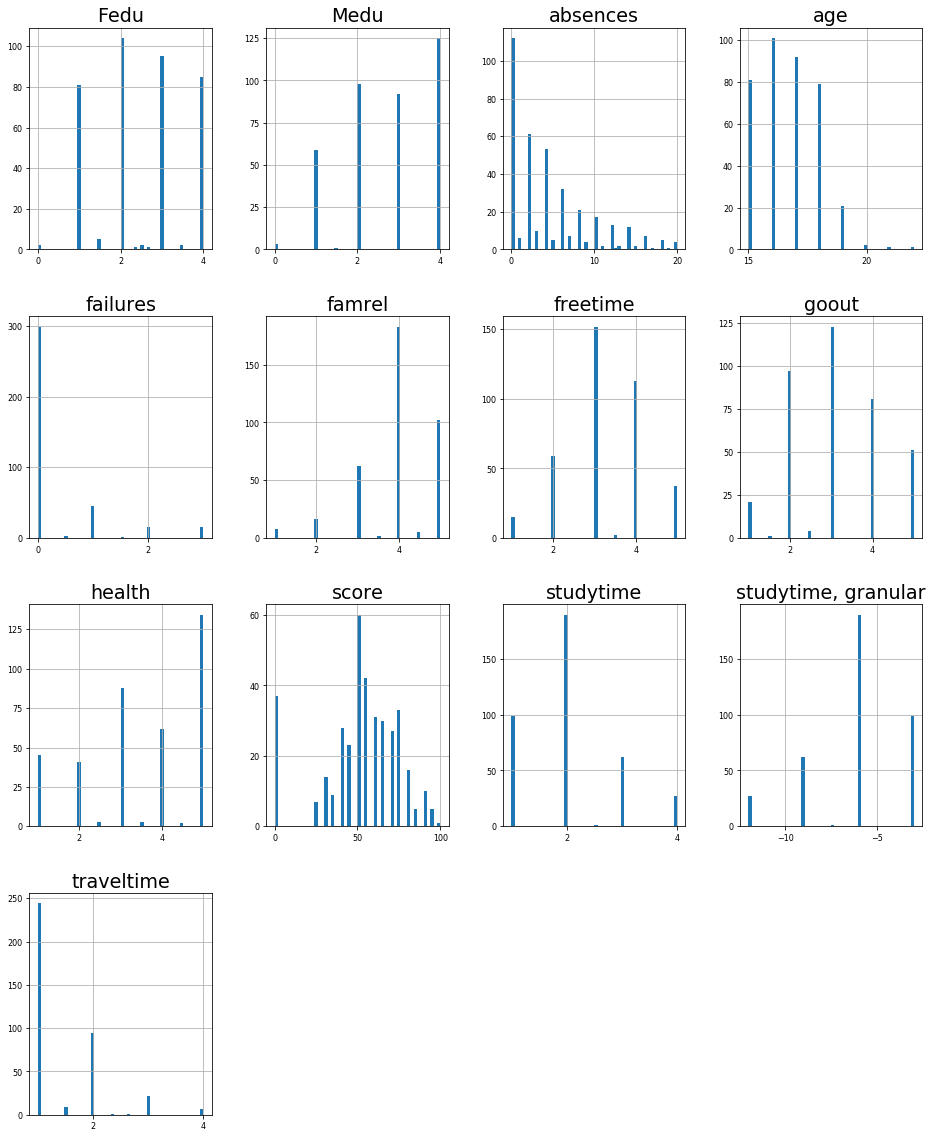

In [36]:
math_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
# ; avoid having the matplotlib verbose informations

'studytime' and 'studytime, granular' look like inverted each other. no matter no matter what i drop but 'studytime, granular' don't present in columns description

In [37]:
math_num = math_num.drop(columns=['studytime, granular'])

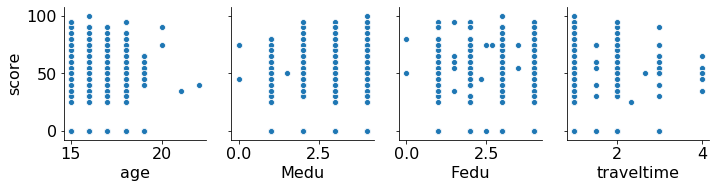

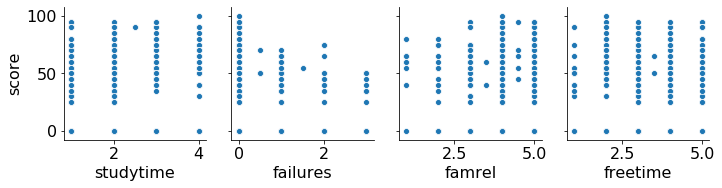

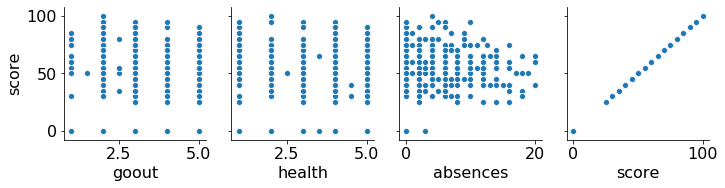

In [38]:
for i in range(0, len(math_num.columns), 4):
    sns.pairplot(data=math_num,
                 x_vars=math_num.columns[i:i + 4],
                 y_vars=['score'])

lets find best correlations with score

In [39]:
math_num_corr = math_num.corr(
)['score'][:-1]  # -1 because the latest row is score
super_list = math_num_corr[abs(math_num_corr) > 0.10].sort_values(
    ascending=False)
print("There is {} strongly correlated values with score:\n{}".format(
    len(super_list), super_list))

There is 6 strongly correlated values with score:
Medu         0.213033
studytime    0.121066
Fedu         0.121030
goout       -0.115719
age         -0.162107
failures    -0.328901
Name: score, dtype: float64


Numerical data from 6 columns significantly affect the target data. There are 'Medu', 'Fedu', 'studytime', 'goout', 'age', 'failures'. However, the following is obtained: the better the education of the parents and the more studytime , the better the result. At the same time, younger students who avoid trouble and spend time wisely with friends show themselves better.

## binary data

Earlier, I filled NaN values for string data with a new sign “noData”, it is obvious that this will interfere with the evaluation of binary data. We perform additional data manipulations

In [40]:
math_bin = math[[
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
    'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'score'
]].copy()

In [41]:
math_bin.dropna(inplace=True)

In [42]:
math_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 3 to 391
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      171 non-null    object 
 1   sex         171 non-null    object 
 2   address     171 non-null    object 
 3   famsize     171 non-null    object 
 4   Pstatus     171 non-null    object 
 5   schoolsup   171 non-null    object 
 6   famsup      171 non-null    object 
 7   paid        171 non-null    object 
 8   activities  171 non-null    object 
 9   nursery     171 non-null    object 
 10  higher      171 non-null    object 
 11  internet    171 non-null    object 
 12  romantic    171 non-null    object 
 13  score       171 non-null    float64
dtypes: float64(1), object(13)
memory usage: 20.0+ KB


for visual comparison use barplot:

In [43]:
def eda_barplot(column):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.barplot(x=column, y='score', data=math_bin, ax=ax)
    plt.show()

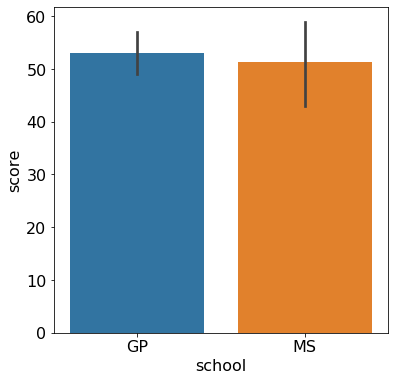

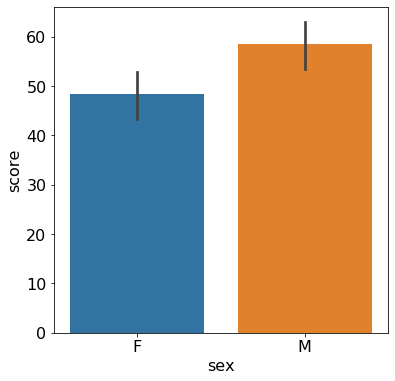

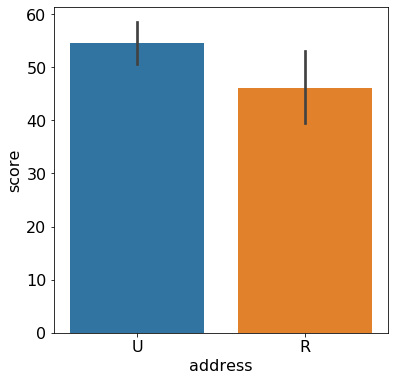

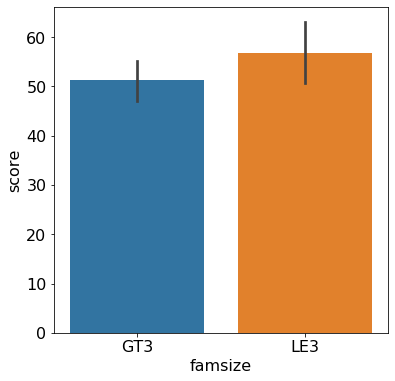

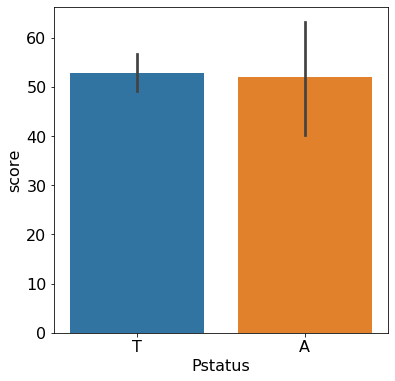

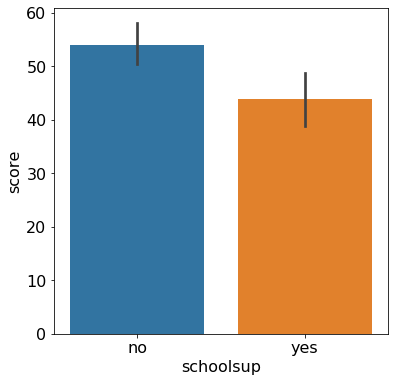

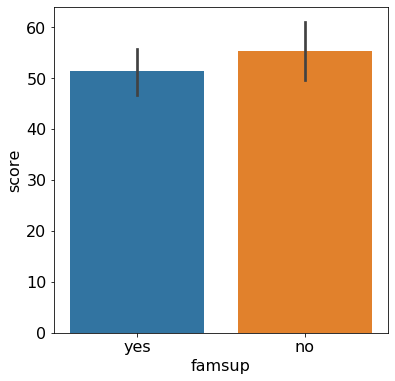

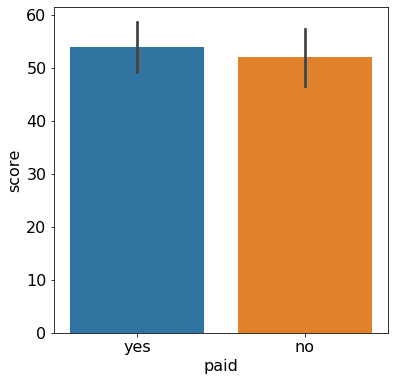

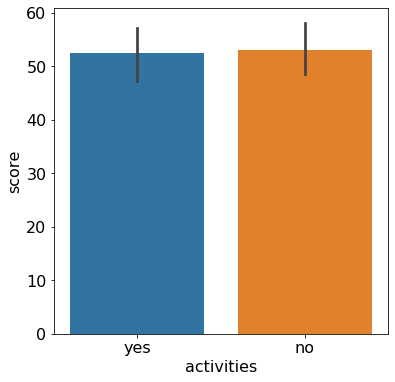

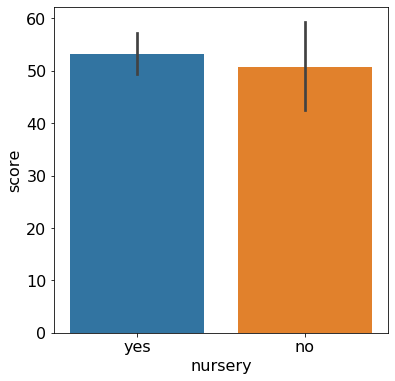

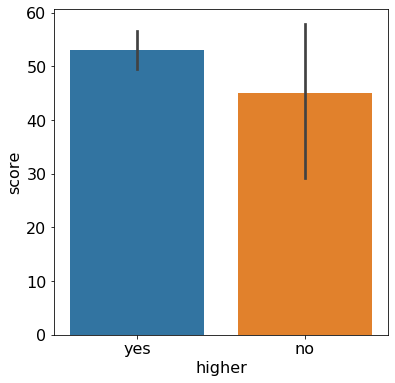

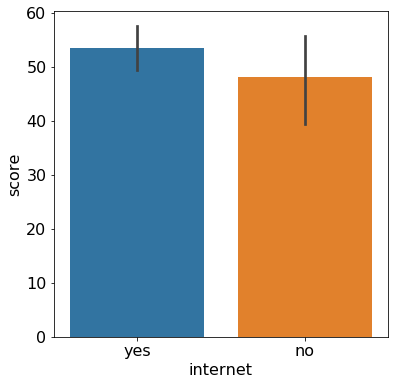

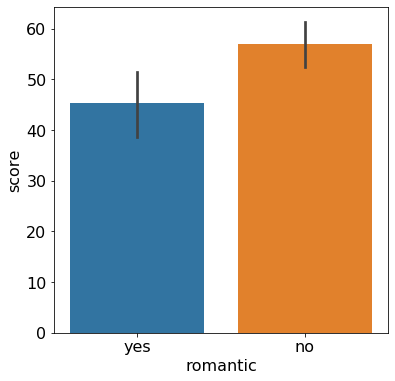

In [44]:
for col in math_bin.loc[:, math_bin.columns != 'score'].columns:
    eda_barplot(col)

it can be seen that among binary columns 'sex' influences, males are slightly more productive; 
'address' - urban residents are also slightly more productive.

positively affects the presence in the family of no more than three members according to the column 'famsize'

In addition, the presence of:

    - internet;

    - aspirations for further education. 
    
Based on the data in the columns 'internet' and 'higher', respectively.

negatively affects the presence of:

    - school support (it can be assumed that such an intervention creates a certain level of stress);

    - romantic relationships.

according to the columns in 'schoolsup' and 'romantic' respectively.

## nominal data

There ara four nominal data columns:
'Mjob',
'Fjob',
'reason',
'guardian',

make special only nominal columns dataset from fixed and filled dtatset, named math_copy:

In [45]:
math_nom = math_copy[['Mjob', 'Fjob', 'reason', 'guardian', 'score']].copy()

In [46]:
math_nom.head()

,Mjob,Fjob,reason,guardian,score
0,at_home,teacher,course,mother,30.0
1,at_home,other,course,father,30.0
2,at_home,other,other,mother,50.0
3,health,noData,home,mother,75.0
4,other,other,home,father,50.0


use boxplot visual comparison:

In [47]:
def eda_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=math_nom, ax=ax)
    plt.xticks(rotation=30)
    plt.show()

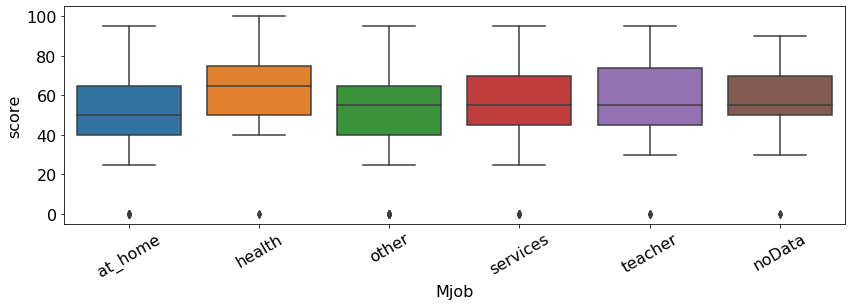

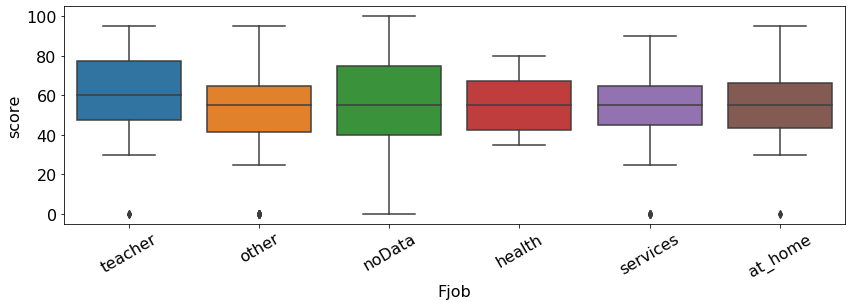

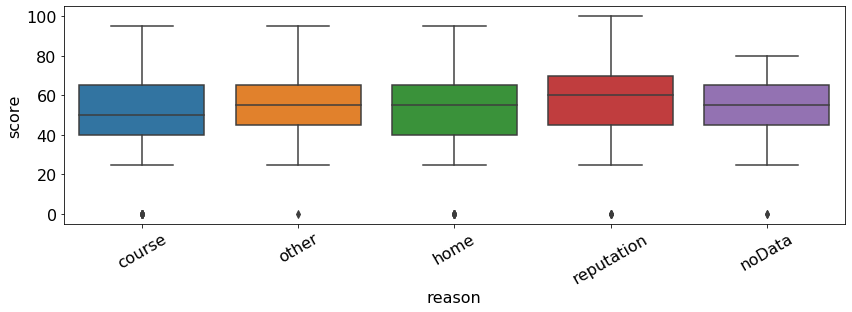

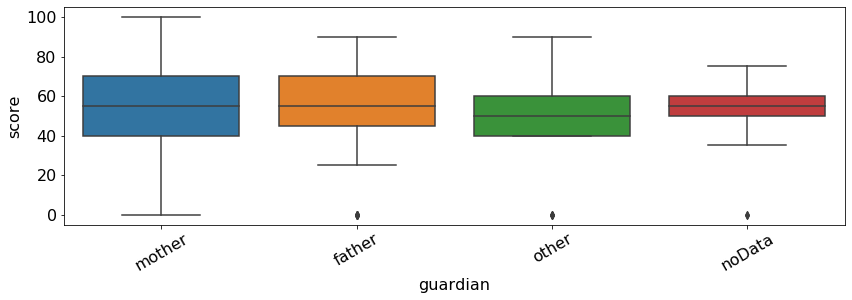

In [48]:
for col in math_nom.loc[:, math_nom.columns != 'score'].columns:
    eda_boxplot(col)

In [49]:
def eda_stat_dif(column):
    cols = math_nom.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math_nom.loc[math_nom.loc[:, column] == comb[0], 'score'],
                        math_nom.loc[math_nom.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Bonferoni Amendment
            print('Statistically significant differences found for column',
                  column)
            break

In [50]:
for col in math_nom.loc[:, math_nom.columns != 'score'].columns:
    eda_stat_dif(col)

hm...let's try to drop zero values from 'score'

In [51]:
math_nom2 = math_nom.copy()

In [52]:
math_nom2.drop(math_nom2.loc[math_nom2['score'] == 0].index, inplace=True)

In [53]:
def next_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score', data=math_nom2, ax=ax)
    plt.xticks(rotation=30)
    plt.show()

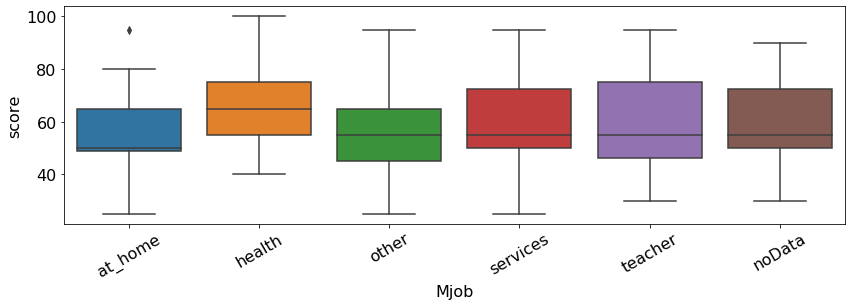

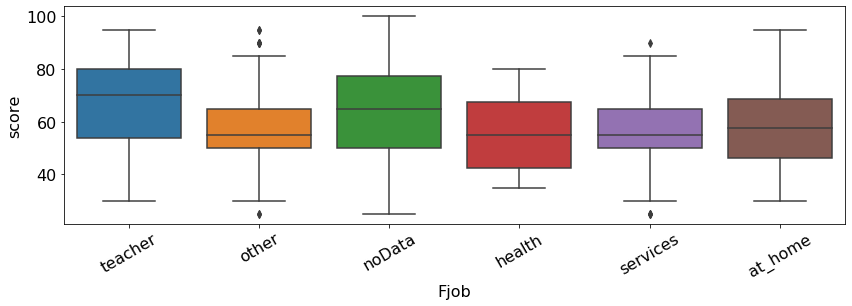

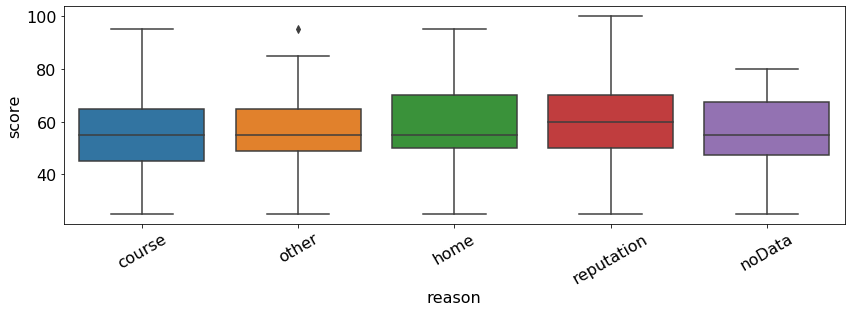

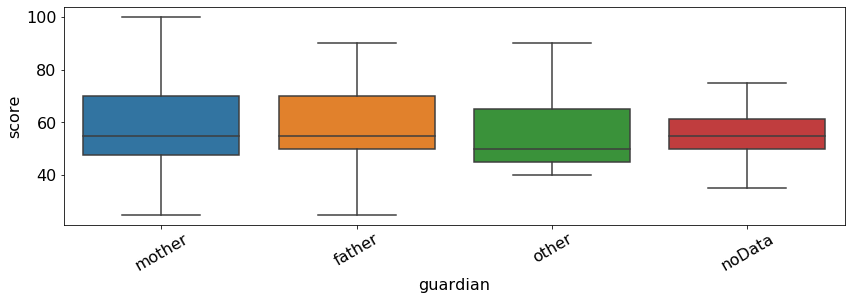

In [54]:
for col in math_nom2.loc[:, math_nom2.columns != 'score'].columns:
    next_boxplot(col)

In [55]:
def next_stat_dif(column):
    cols = math_nom2.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math_nom2.loc[math_nom.loc[:, column] == comb[0], 'score'],
                        math_nom2.loc[math_nom.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Bonferoni Amendment
            print('Statistically significant differences found for column',
                  column)
            break

In [56]:
for col in math_nom2.loc[:, math_nom2.columns != 'score'].columns:
    next_stat_dif(col)

Statistically significant differences found for column Mjob


Bingo! 'Mjob' column stays in the dataset because it affects the target dataset.

# Model

## dataset for further model building

according to the results of the analysis, there is reason to assume that the data in columns:
    
    'Medu', 
    'Fedu', 
    'studytime', 
    'goout', 
    'age', 
    'failures', 
    'internet', '
    higher', 
    'schoolsup', 
    'romantic', 
    'Mjob'
    
affect the target column data 'score'

In [57]:
math_for_model = math_copy[[
    'Medu', 'Fedu', 'studytime', 'goout', 'age', 'failures', 'internet',
    'higher', 'schoolsup', 'romantic', 'Mjob', 'score'
]].copy()
math_for_model.head()

,Medu,Fedu,studytime,goout,age,failures,internet,higher,schoolsup,romantic,Mjob,score
0,4.0,4.0,2.0,4.0,18,0.0,noData,yes,yes,no,at_home,30.0
1,1.0,1.0,2.0,3.0,17,0.0,yes,yes,no,no,at_home,30.0
2,1.0,1.0,2.0,2.0,15,3.0,yes,yes,yes,noData,at_home,50.0
3,4.0,2.0,3.0,2.0,15,0.0,yes,yes,no,yes,health,75.0
4,3.0,3.0,2.0,2.0,16,0.0,no,yes,no,no,other,50.0


## conclusion and last revelations

It might have been worth excluding 0 from the 'score' even while working with numeric data. And it would also be possible not to exclude "noData" values when analyzing binary data (although then this would cease to be binary, by the way, they would be included in the final dataset like that)